In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from seaborn import objects as so

data_train = pd.read_csv(filepath_or_buffer="../data/processed/train_to_visu.csv")

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
data_train

,IdPasajero,Condicion,Clase,Genero,Edad,#Hermanos o conyuges a bordo,#Padres o hijos a bordo,Ticket,Tarifa,Cabina,Puerto de embarcacion
0,1,Fallecido,Tercera,Hombre,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Sobreviviente,Primera,Mujer,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Sobreviviente,Tercera,Mujer,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Sobreviviente,Primera,Mujer,35.0,1,0,113803,53.1000,C123,Southampton
4,5,Fallecido,Tercera,Hombre,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,887,Fallecido,Segunda,Hombre,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,Sobreviviente,Primera,Mujer,19.0,0,0,112053,30.0000,B42,Southampton
888,889,Fallecido,Tercera,Mujer,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
889,890,Sobreviviente,Primera,Hombre,26.0,0,0,111369,30.0000,C148,Cherbourg


## Relación entre cada atributo y el objetivo


### Cantidad de pasajeros por clase


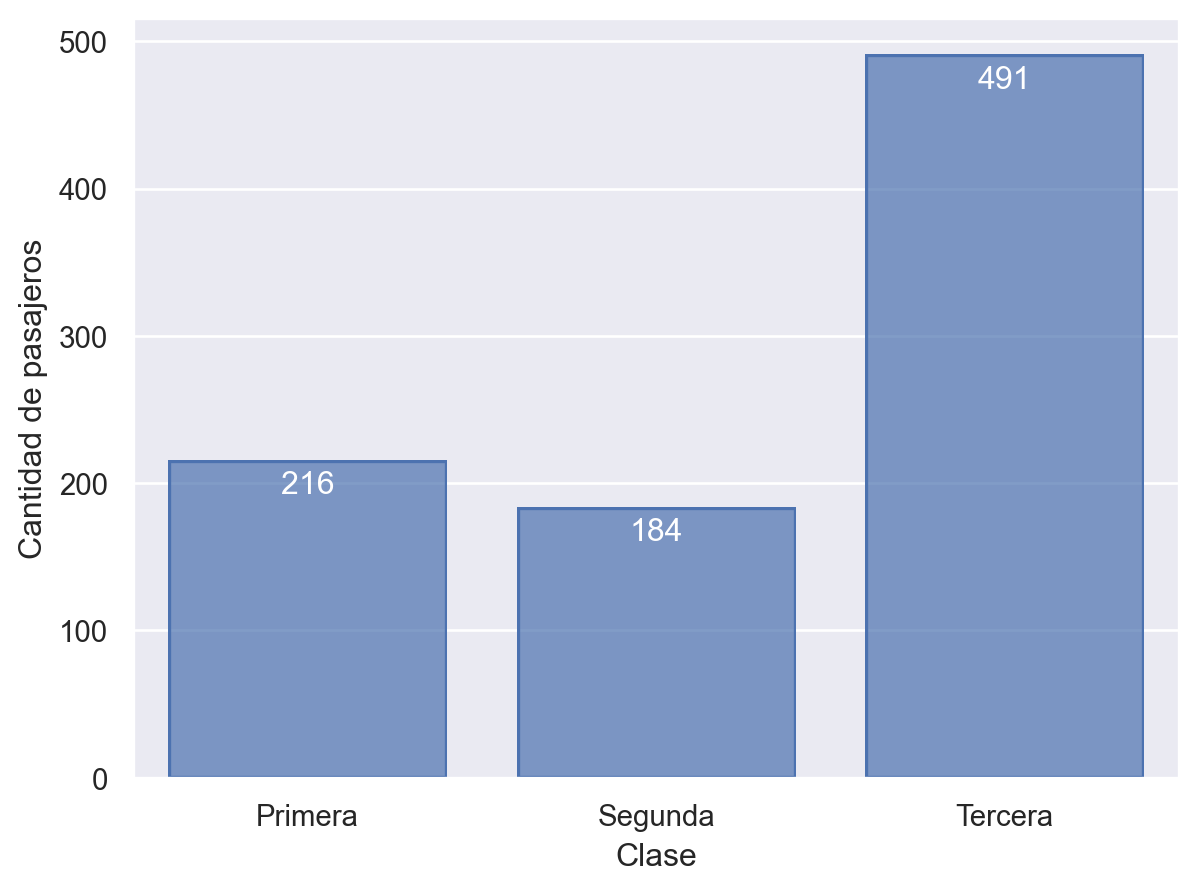

In [60]:
so.Plot(
    data=data_train.loc[:, ["Clase"]]
    .groupby(by="Clase")
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"}),
    x="Clase",
    y="Cantidad",
    text="Cantidad",
).add(so.Bar()).add(so.Text(valign="top", color="w")).label(y="Cantidad de pasajeros")

### Cantidad de sobrevivientes por clase


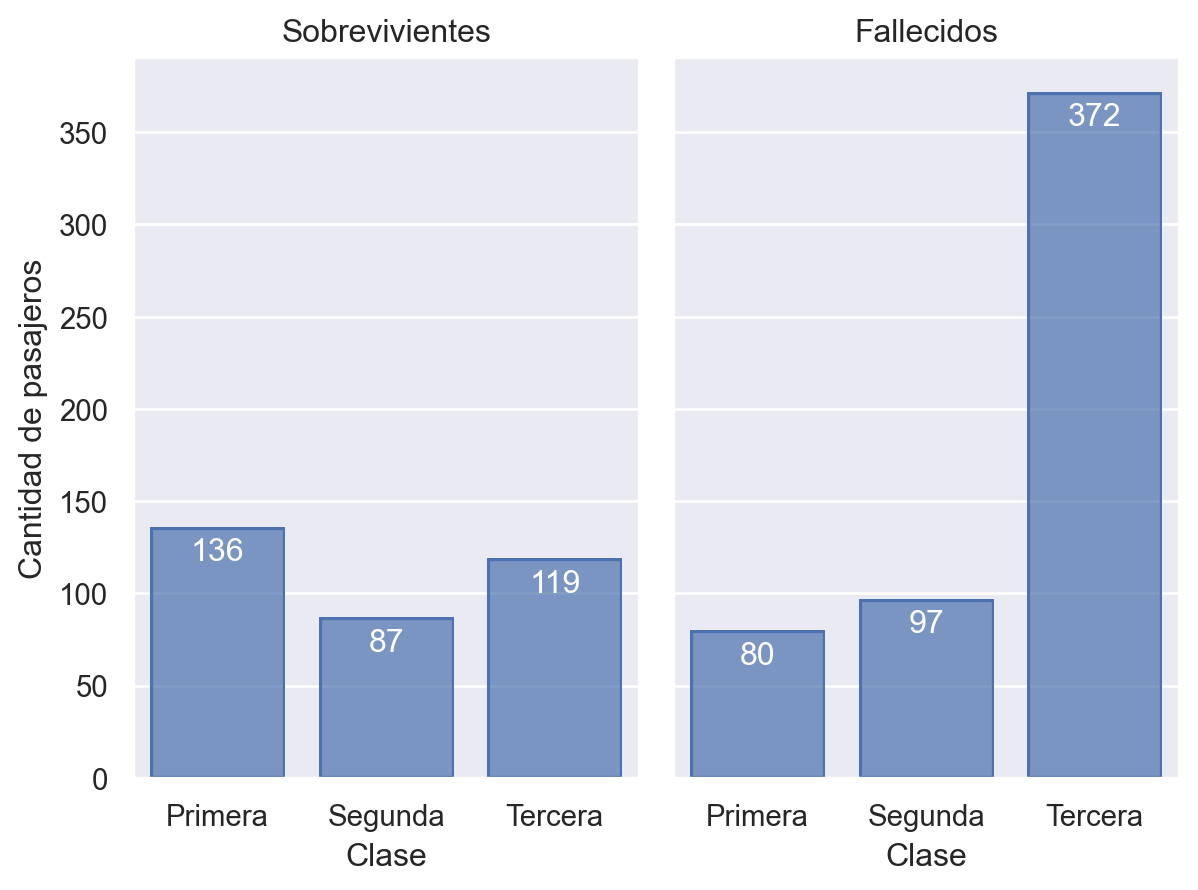

In [61]:
so.Plot(
    data=data_train.loc[:, ["Clase", "Condicion"]]
    .groupby(by=["Clase", "Condicion"])
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"}),
    x="Clase",
    y="Cantidad",
    text="Cantidad",
).facet(col="Condicion", order=["Sobreviviente", "Fallecido"]).add(so.Bar()).add(
    so.Text(color="white", valign="top")
).label(
    title="{}s".format, y="Cantidad de pasajeros"  # type: ignore
)

### Cantidad de pasajeros por género


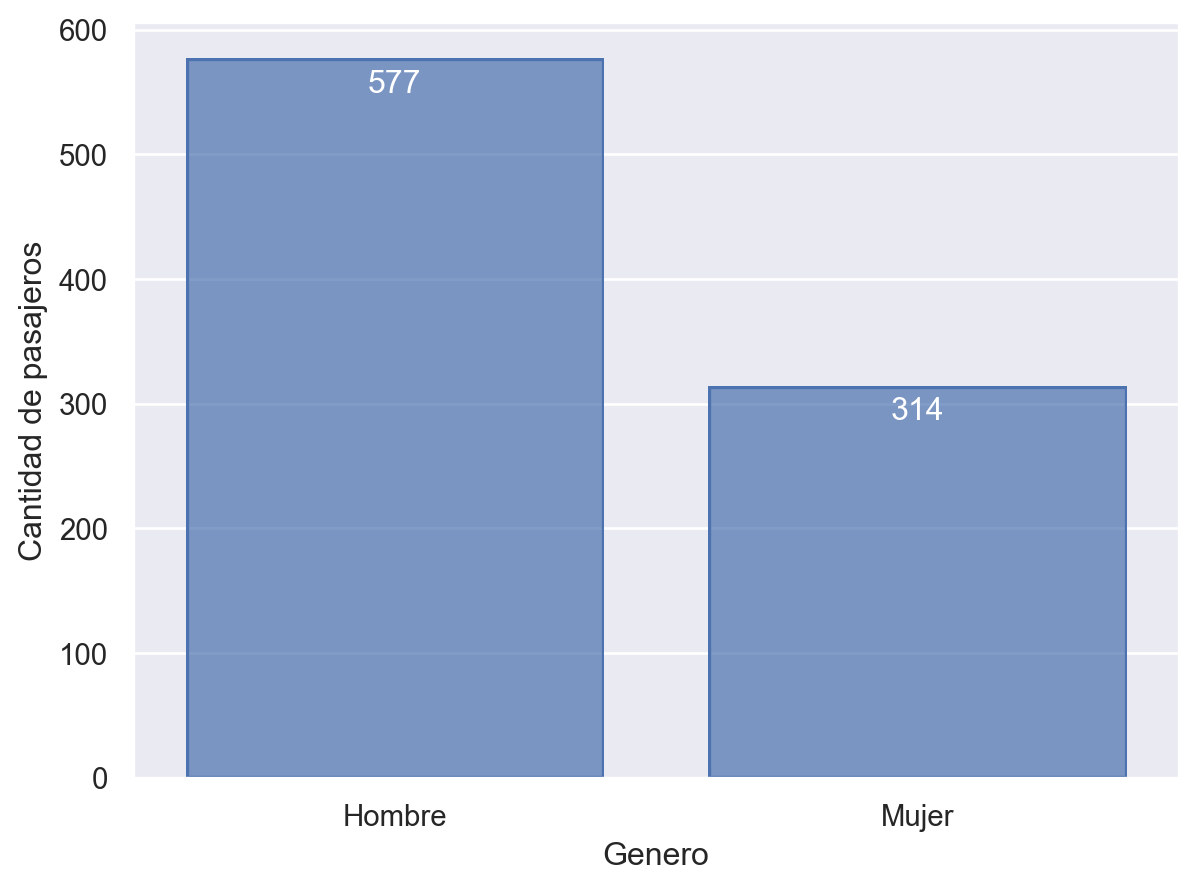

In [59]:
so.Plot(
    data=data_train.loc[:, ["Genero"]]
    .groupby(by="Genero")
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"}),
    x="Genero",
    y="Cantidad",
    text="Cantidad",
).add(so.Bar()).add(so.Text(color="w", valign="top")).label(y="Cantidad de pasajeros")

### Cantidad de sobrevivientes por género


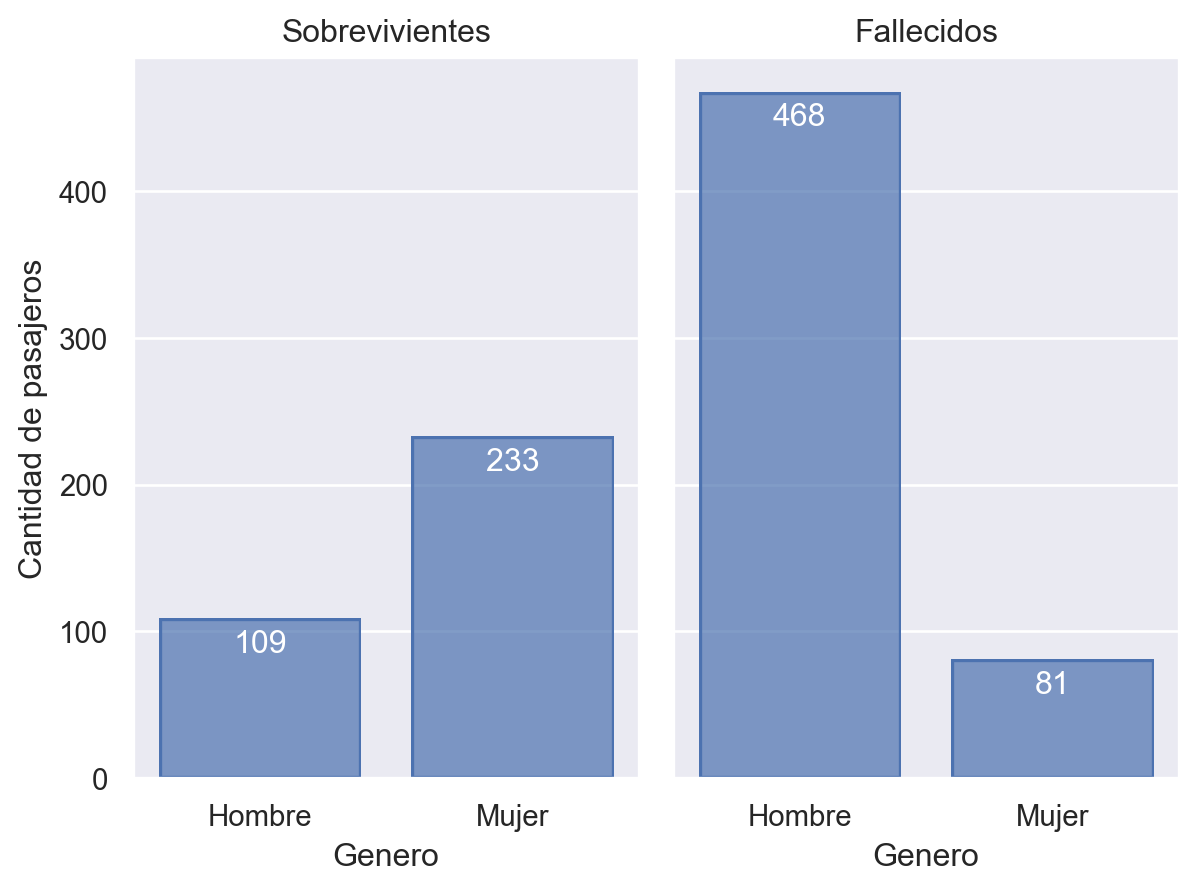

In [62]:
so.Plot(
    data=data_train.loc[:, ["Genero", "Condicion"]]
    .groupby(by=["Genero", "Condicion"])
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"}),
    x="Genero",
    y="Cantidad",
    text="Cantidad",
).facet(col="Condicion", order=["Sobreviviente", "Fallecido"]).add(so.Bar()).add(
    so.Text(color="white", valign="top")
).label(
    title="{}s".format, y="Cantidad de pasajeros"  # type: ignore
)

### Cantidad de pasajeros por edad


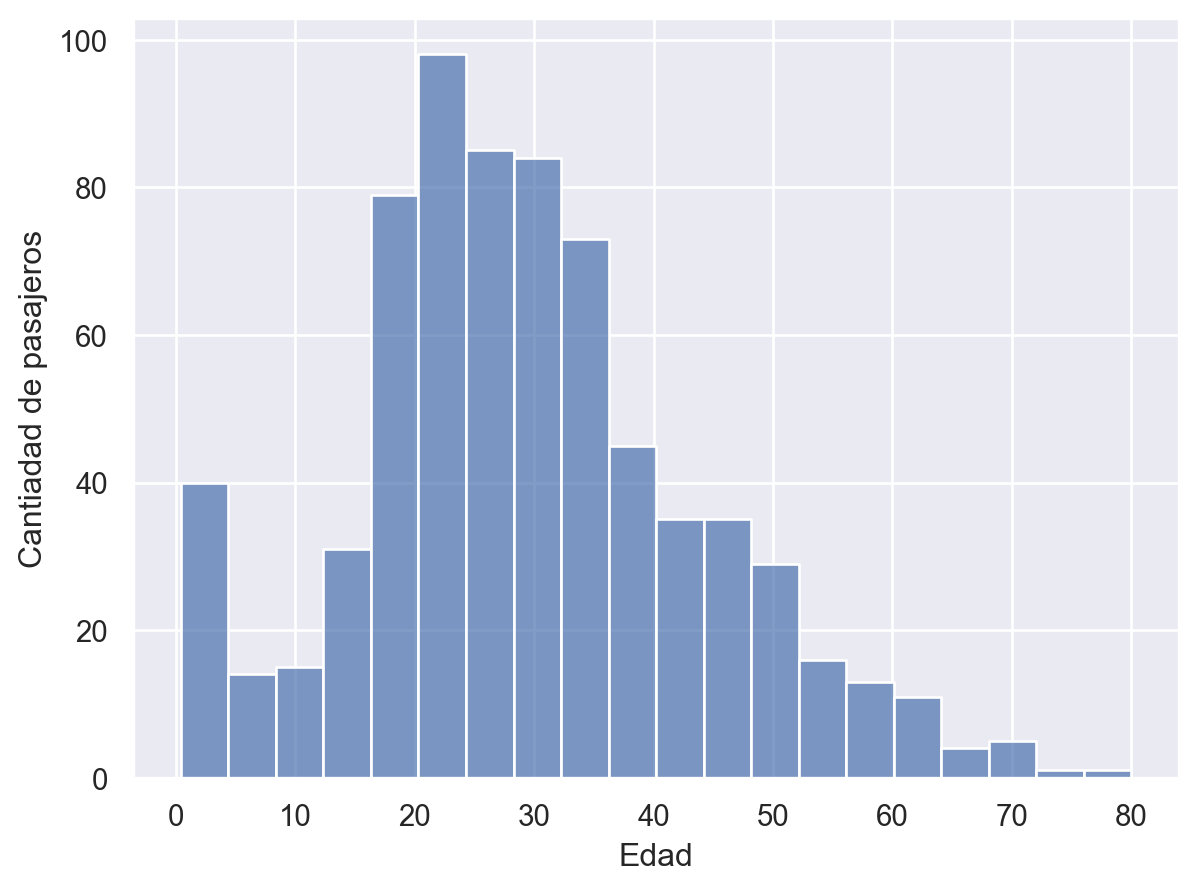

In [66]:
so.Plot(
    data=data_train.loc[data_train["Edad"].notna(), ["Edad"]],
    x="Edad",
).add(
    so.Bars(), so.Hist(stat="count")
).label(y="Cantiadad de pasajeros")

### Cantidad de pasajeros por rango etario


In [11]:
data_survivors_by_age_range = (
    data_survivors_by_age.apply(
        apply_range_age,
        axis=1,
    )
    .groupby(by=["Rango etario", "Condicion"])
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"})
)


data_survivors_by_age_range

,Rango etario,Condicion,Cantidad
0,Adolecencia,Fallecido,23
1,Adolecencia,Sobreviviente,22
2,Adultez,Fallecido,226
3,Adultez,Sobreviviente,159
4,Infancia,Fallecido,16
5,Infancia,Sobreviviente,8
6,Juventud,Fallecido,125
7,Juventud,Sobreviviente,63
8,Persona adulta,Fallecido,21
9,Persona adulta,Sobreviviente,7


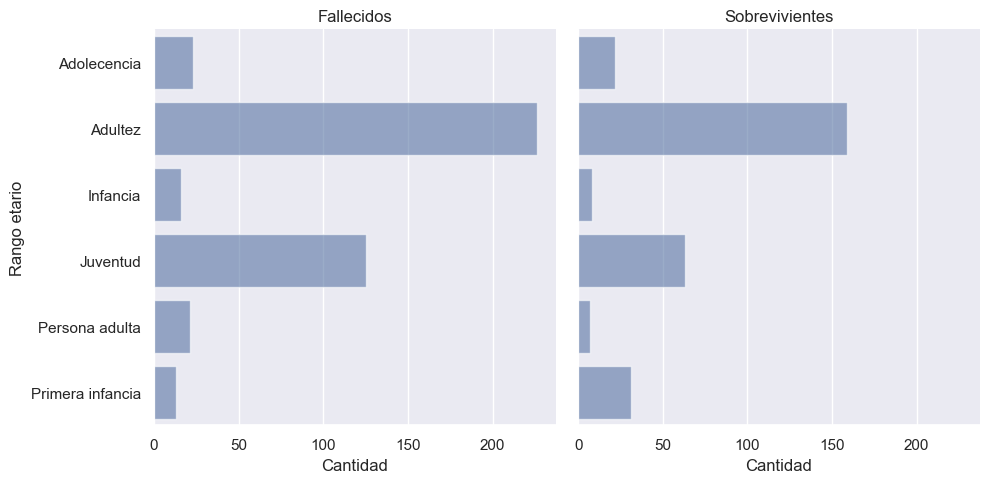

In [12]:
graph_survivors_by_age_range = sns.catplot(
    data=data_survivors_by_age_range,
    kind="bar",
    y="Rango etario",
    col="Condicion",
    x="Cantidad",
    orient="h",
    alpha=0.6,
).set_titles(template="{col_name}s")

#### Que podemos decir que los pasajeros cuya edad edad es desconocida?


In [13]:
data_survivors_with_unknow_age = (
    data_train.copy()
    .loc[data_train["Edad"].isna(), ["Edad", "Condicion"]]
    .groupby(by="Condicion")
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"})
)

data_survivors_with_unknow_age

,Condicion,Cantidad
0,Fallecido,125
1,Sobreviviente,52


Existen tanto sobrevivientes como fallecidos, cuya edad es desconocida. Recomiendo tenerlos en cuenta en algoritmos de AA.


#### Propoción de sobrevivientes en rangos etarios


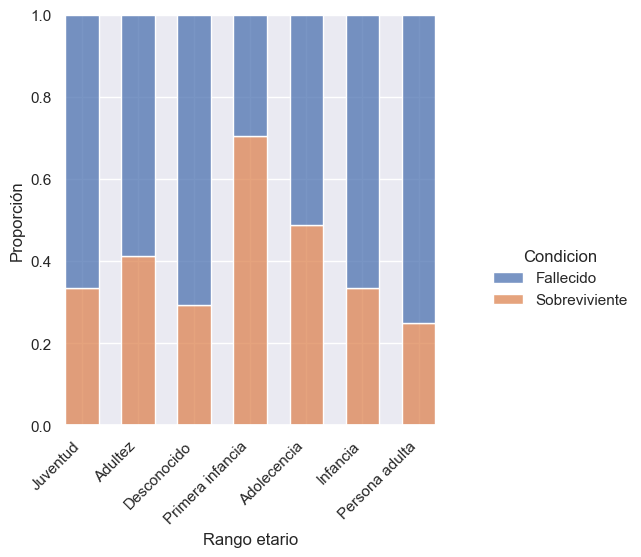

In [14]:
graph_survivors_by_age_range_proportion = sns.displot(
    data=data_train.apply(apply_range_age, axis=1),
    kind="hist",
    x="Rango etario",
    hue="Condicion",
    shrink=0.6,
    multiple="fill",
)

graph_survivors_by_age_range_proportion.set_ylabels(label="Proporción")

xticks = graph_survivors_by_age_range_proportion.ax.set_xticks(
    ticks=graph_survivors_by_age_range_proportion.ax.get_xticks()
)

labels = graph_survivors_by_age_range_proportion.ax.set_xticklabels(
    labels=graph_survivors_by_age_range_proportion.ax.get_xticklabels(),
    rotation=45,
    ha="right",
)